In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
prefix = '/home/martin/Measurements/21_05_29_tool_insertion_to_close_up/05/exports'

# Conitnuous Measurements

In [38]:
pd_path = os.path.join(prefix, 'pairwise_distance.csv')
df_pd = pd.read_csv(pd_path)
df_pd.time = df_pd.time.apply(lambda x: x - df_pd.time.iloc[0])
df_pd

,time,mean_pairwise_distance,std_pairwise_distance,n_matches
0,0.000000,0.958387,1.134081,114
1,0.070827,14.278513,5.287264,63
2,0.282284,15.904059,5.372552,53
3,0.423511,14.853664,5.629015,72
4,0.555393,15.759814,5.669341,54
...,...,...,...,...
508,80.461215,2.689237,1.156225,155
509,80.714182,2.664328,1.307964,157
510,80.864795,2.295908,1.247457,147
511,81.098593,2.198224,1.226763,159


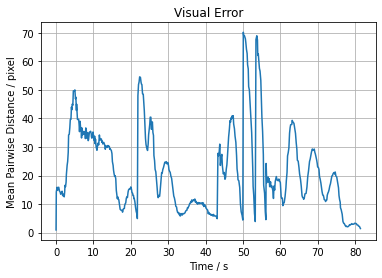

In [39]:
plt.plot(df_pd.time, df_pd.mean_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / s')
plt.ylabel('Mean Pairwise Distance / pixel')
plt.grid()
plt.show()
# plt.savefig('visual_error.pdf')

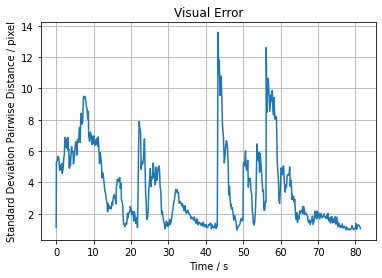

In [40]:
plt.plot(df_pd.time, df_pd.std_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / s')
plt.ylabel('Standard Deviation Pairwise Distance / pixel')
plt.grid()
plt.show()
# plt.savefig('visual_error.pdf')

In [41]:
fb_path = os.path.join(prefix, 'h_rcm_vs_feedback.csv')
df_fb = pd.read_csv(fb_path)
df_fb.time = df_fb.time.apply(lambda x: x - df_fb.time.iloc[0])


# compute euclidean distance on trocar position error
df_fb['p_trocar_error_euclidean_distance'] = np.linalg.norm(
    np.array([df_fb['errors.p_trocar.position.x'], df_fb['errors.p_trocar.position.y'], df_fb['errors.p_trocar.position.z']])*1.e3, axis=0
)

df_fb

,time,states.task.values,states.p_trocar.position.x,states.p_trocar.position.y,states.p_trocar.position.z,errors.task.values,errors.p_trocar.position.x,errors.p_trocar.position.y,errors.p_trocar.position.z,p_trocar_error_euclidean_distance
0,0.000000,"(0.0, 0.0, 0.0, 0.0)",0.843272,-0.058350,0.199371,"(0.0003293593548161543, 0.0006389719251073618,...",-0.000107,0.001407,-0.001836,2.315657
1,0.031698,"(0.0, 0.0, 0.0, 0.0)",0.843359,-0.058300,0.199365,"(0.0003293593548161543, 0.0006389719251073618,...",-0.000194,0.001357,-0.001830,2.286212
2,0.059643,"(0.0, 0.0, 0.0, 0.0)",0.843555,-0.058013,0.199337,"(0.0003293593548161543, 0.0006389719251073618,...",-0.000389,0.001070,-0.001802,2.131775
3,0.097018,"(0.0, 0.0, 0.0, 0.0)",0.843500,-0.057715,0.198954,"(0.0003293593548161543, 0.0006389719251073618,...",-0.000335,0.000772,-0.001419,1.649928
4,0.119749,"(0.0, 0.0, 0.0, 0.0)",0.843460,-0.057385,0.198595,"(0.0003293593548161543, 0.0006389719251073618,...",-0.000294,0.000442,-0.001060,1.185564
...,...,...,...,...,...,...,...,...,...,...
2805,84.351313,"(0.0, 0.0, 0.0, 0.0)",0.843570,-0.056611,0.198272,"(0.0009086932868031261, 0.00020873177970986233...",-0.000404,-0.000332,-0.000737,0.903479
2806,84.381471,"(0.0, 0.0, 0.0, 0.0)",0.843570,-0.056611,0.198272,"(0.0009086932868031261, 0.00020873177970986233...",-0.000404,-0.000332,-0.000737,0.903558
2807,84.402978,"(0.0, 0.0, 0.0, 0.0)",0.843570,-0.056611,0.198272,"(0.0009086932868031261, 0.00020873177970986233...",-0.000404,-0.000332,-0.000737,0.903616
2808,84.434986,"(0.0, 0.0, 0.0, 0.0)",0.843570,-0.056611,0.198272,"(0.0009086932868031261, 0.00020873177970986233...",-0.000404,-0.000332,-0.000737,0.903570


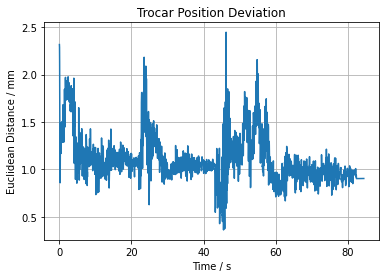

In [42]:
plt.plot(df_fb.time, df_fb.p_trocar_error_euclidean_distance)
plt.title('Trocar Position Deviation')
plt.xlabel('Time / s')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
plt.show()
# plt.savefig('trocar_position_deviation.pdf')

In [43]:
twist_path = os.path.join(prefix, 'twist.csv')
df_twist = pd.read_csv(twist_path)
df_twist.time = df_twist.time.apply(lambda x: x - df_twist.time[0])
df_twist

,time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,0.000000,0.0,0.0,0.000329,0.006390,0.006100,0.007014
1,0.188505,0.0,0.0,-0.002494,0.001998,0.010172,0.015314
2,0.323017,0.0,0.0,-0.006219,-0.000841,0.017785,0.023192
3,0.459688,0.0,0.0,-0.008031,-0.001616,0.022306,0.031779
4,0.642726,0.0,0.0,-0.010617,-0.010919,0.022123,0.039694
...,...,...,...,...,...,...,...
502,80.393857,0.0,0.0,-0.001391,-0.001965,0.000338,0.005493
503,80.619074,0.0,0.0,-0.000875,-0.001331,-0.000544,0.005298
504,80.772368,0.0,0.0,0.000280,0.000982,-0.001661,0.004925
505,81.012616,0.0,0.0,0.000740,0.002140,-0.001942,0.004768


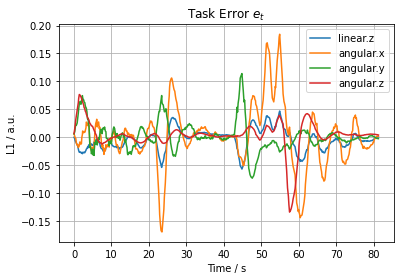

In [44]:
skip = [
    'time',
    'linear.x',
    'linear.y'
]

for key, col in df_twist.iteritems():
    if key in skip:
        continue
    plt.plot(df_twist.time, df_twist[key], label=key)

plt.title('Task Error $e_t$')
plt.xlabel('Time / s')
plt.ylabel('L1 / a.u.')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('task_error.pdf')

In [45]:
joint_state_path = os.path.join(prefix, 'joint_states.csv')
df_joint_state = pd.read_csv(joint_state_path)
df_joint_state.time = df_joint_state.time.apply(lambda x: x - df_joint_state.time[0])


df_joint_state['JointState.position'] = df_joint_state['JointState.position'].apply(lambda x: np.array([float(xi) for xi in x.replace('(', '').replace(')', '').split(',')]))


for i in range(df_joint_state['JointState.position'].iloc[0].shape[0]):
    plt.plot(df_joint_state.time, df_joint_state['JointState.position'].apply(lambda x: x[i] - df_joint_state['JointState.position'].iloc[0][i]))

plt.title('Joint State Deviation')
plt.xlabel('Time / s')
plt.ylabel('Delta / rad')
plt.grid()
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/martin/Measurements/21_05_29_tool_insertion_to_close_up/04/exports/joint_states.csv'

# Episodic Measurements

No handles with labels found to put in legend.


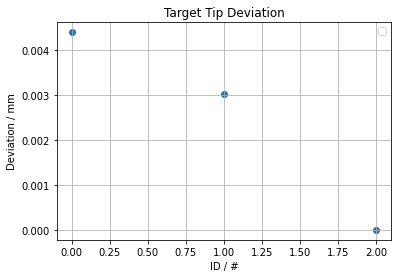

In [73]:
path_path = os.path.join(prefix, 'path_0.csv')
df_path = pd.read_csv(path_path)
df_path.time = df_path.time.apply(lambda x: x - df_path.time[0])

# deviation target and final
df_path['target_rcm.task.values'] = df_path['target_rcm.task.values'].apply(lambda x: [float(xi) for xi in x.replace('(', '').replace(')', '').split(',')])
df_path['final_rcm.task.values'] = df_path['final_rcm.task.values'].apply(lambda x: [float(xi) for xi in x.replace('(', '').replace(')', '').split(',')])

# tip deviation
df_path['tip_euclidean_distance'] = df_path['target_rcm.task.values'].apply(lambda x: np.array(x[:-1])) - df_path['final_rcm.task.values'].apply(lambda x: np.array(x[:-1]))
df_path.tip_euclidean_distance = df_path.tip_euclidean_distance.apply(lambda x: np.linalg.norm(x))

# plot
plt.scatter(df_path.id, df_path.tip_euclidean_distance)
plt.title('Target Tip Deviation')
plt.xlabel('ID / #')
plt.ylabel('Deviation / mm')
plt.grid()
plt.legend()
plt.show()  # replace kinematics


No handles with labels found to put in legend.


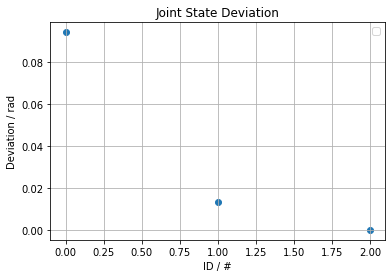

In [74]:
path_path = os.path.join(prefix, 'path_0.csv')
df_path = pd.read_csv(path_path)
df_path.time = df_path.time.apply(lambda x: x - df_path.time[0])

df_path['target_joint_state.position']
# deviation initial and final
df_path['target_joint_state.position'] = df_path['target_joint_state.position'].apply(lambda x: np.array([float(xi) for xi in x.replace('(', '').replace(')', '').split(',')]))
df_path['final_joint_state.position'] = df_path['final_joint_state.position'].apply(lambda x: np.array([float(xi) for xi in x.replace('(', '').replace(')', '').split(',')]))

df_path['joint_state_euclidean_distance'] = df_path['target_joint_state.position'] - df_path['final_joint_state.position']
df_path.joint_state_euclidean_distance = df_path.joint_state_euclidean_distance.apply(lambda x: np.linalg.norm(x))

# plot
plt.scatter(df_path.id, df_path.joint_state_euclidean_distance)
plt.title('Joint State Deviation')
plt.xlabel('ID / #')
plt.ylabel('Deviation / rad')
plt.grid()
plt.legend()
plt.show()  # replace kinematics